# Hypothesis Testing - Determine the Null and Alternative Hypothesis

### Exercise 1

**Scenario**: FashionFiesta is an online clothing store that sells apparel for men, women, and children. They recently made changes to their website's layout in an attempt to increase the average purchase amount. They conducted an A/B test where half of their visitors saw the old layout (Group A) and the other half saw the new layout (Group B).

**Null hypothesis**: The new layout does not improve the average purchase amount vs the old layout.

**Alternative hypothesis**: The new layout has a higher average purchase amount than the old layout.

### Exercise 2

**Scenario**: :
Previously, FashionFiesta offered direct discounts to its customers. However, this year, they've changed their voucher mechanism to a ladder voucher system to potentially boost sales. A ladder voucher system means that as customers spend more, they earn incrementally higher discounts. For instance, spend 50 dollars, earn a 5% discount, spend 100 dollars and get a 10% discount, and so on. The goal is to incentivize higher spending. Before introducing the ladder voucher, the average number of items per transaction was 3.

**Null hypothesis**: The ladder voucher does not change the average number of items per transaction (3).

**Alternative hypothesis**: The ladder voucher changes the number of items per transaction, i.e. is not 3. 

### Exercise 3

**Scenario**: FashionFiesta has redesigned its checkout page to simplify the process and reduce the number of steps. The company aims to reduce the cart abandonment rate with this new design. Before the redesign, the cart abandonment rate was 20%.

**Null hypothesis**: The redesigned checkout page has a cart abandonment rate of 20%.

**Alternative hypothesis**: The redesigned checkout page has a cart abandonment rate of less than 20%.

# Build a P-value interpreter function with ChatGPT

In [1]:
def interpret_p_value(p_value, threshold=0.05):
    """
    Interpret the p-value in a statistical context against a specific threshold.

    Parameters:
    p_value (float): The p-value to interpret, expected to be in the range 0 to 1.
    threshold (float): The significance level threshold, default is 0.05.

    Returns:
    None: Prints the interpretation of the p-value.

    Raises:
    ValueError: If the p_value or threshold is not within the range [0, 1].

    Description:
    This function assesses the provided p-value against a given threshold:
    - p < threshold: Evidence suggests rejecting the null hypothesis.
    - p >= threshold: Not enough evidence to reject the null hypothesis.

    It's important to note that the interpretation of p-values is context-dependent
    and should be considered along with other factors in statistical analysis.
    """
    if not (0 <= p_value <= 1):
        raise ValueError("p_value must be between 0 and 1.")
    if not (0 <= threshold <= 1):
        raise ValueError("threshold must be between 0 and 1.")

    if p_value < threshold:
        print(f"p-value ({p_value}) is less than the threshold ({threshold}).")
        print("Evidence suggests rejecting the null hypothesis.")
    else:
        print(f"p-value ({p_value}) is greater than or equal to the threshold ({threshold}).")
        print("Not enough evidence to reject the null hypothesis.")

# Example usage
interpret_p_value(0.03, threshold=0.05)

p-value (0.03) is less than the threshold (0.05).
Evidence suggests rejecting the null hypothesis.


# Two-Sample T-Test

FashionFiesta recently launched two new lines of footwear: "Urban Trend" and "Classic Elegance". They want to determine if the average sales (in units) of these two lines are significantly different over a month.

In [2]:
urban_trend = [45, 50, 48, 52, 49, 47, 50, 51, 46, 49, 52, 50, 49, 48, 47, 51, 50, 49, 52, 48, 47, 46, 49, 50, 48, 51, 52, 49, 47, 50]
classic_elegance = [40, 42, 43, 41, 44, 42, 45, 43, 44, 42, 41, 40, 43, 44, 42, 41, 43, 44, 42, 45, 44, 41, 43, 44, 45, 43, 42, 44, 43, 41]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [4]:
%matplotlib inline

In [5]:
# Create the DataFrame
data = pd.DataFrame({'Urban Trend': urban_trend,
                     'Classic Elegance': classic_elegance})

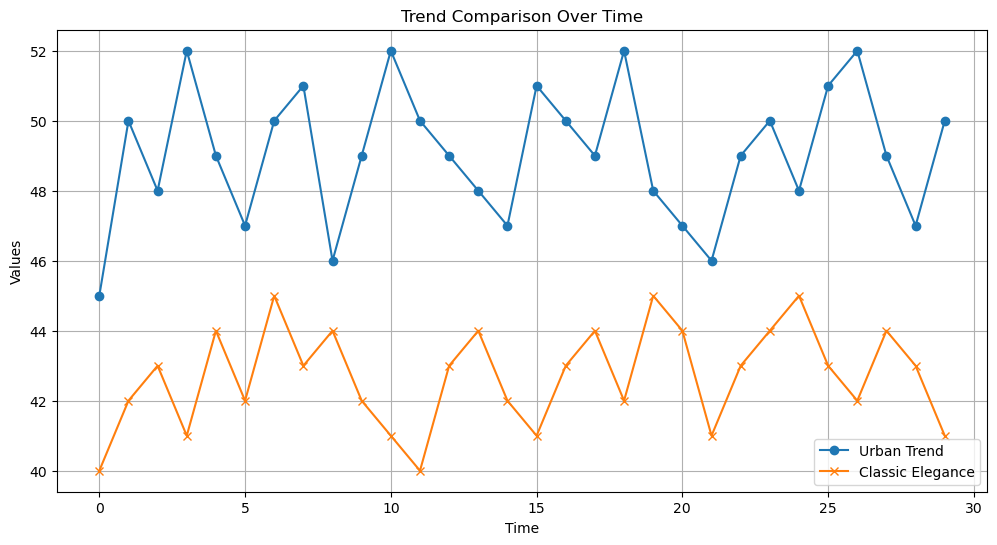

In [6]:
# Line plot for trends over time
plt.figure(figsize=(12, 6))
plt.plot(data['Urban Trend'], label='Urban Trend', marker='o')
plt.plot(data['Classic Elegance'], label='Classic Elegance', marker='x')
plt.title('Trend Comparison Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show();

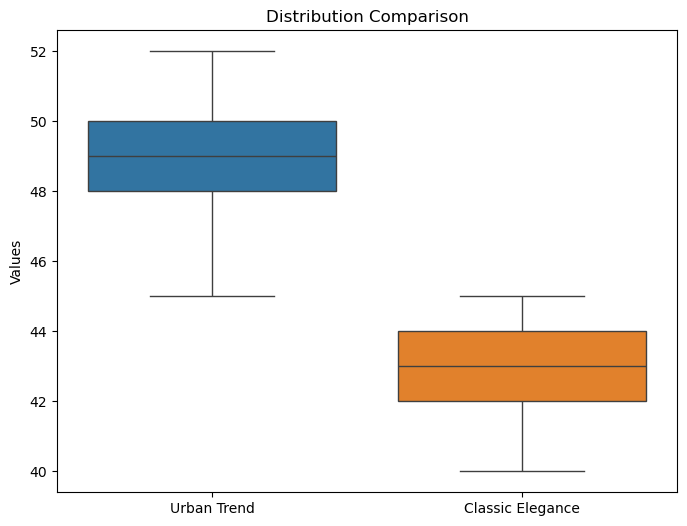

In [7]:
# Box plot for distribution comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Distribution Comparison')
plt.ylabel('Values')
plt.show();

<Figure size 1200x600 with 0 Axes>

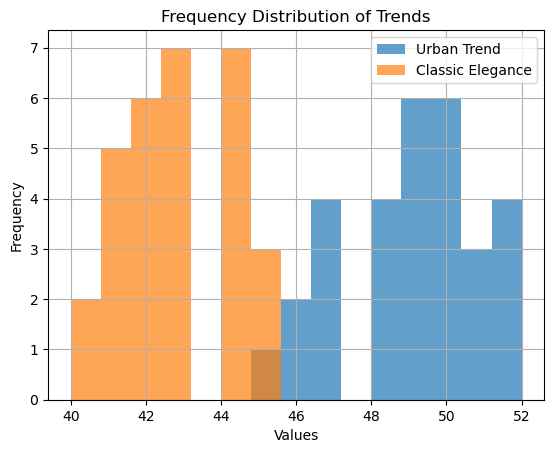

In [8]:
# Histogram for frequency distribution
plt.figure(figsize=(12, 6));
data.plot(kind='hist', alpha=0.7, bins=15);
plt.title('Frequency Distribution of Trends')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show();

## Levene's Test

**Null hypothesis**: There is no difference in the variance of both.

**Alternative hypothesis**: There is a difference in unit sales between both lines.

In [9]:
# Levene's test for equal variances
lenene_stat, pvalue = stats.levene(urban_trend, classic_elegance)
interpret_p_value(pvalue, threshold=0.05)

p-value (0.16668762430296205) is greater than or equal to the threshold (0.05).
Not enough evidence to reject the null hypothesis.


In [11]:
# 2-Sample T-test
statistic, pvalue = stats.ttest_ind(urban_trend,
                                    classic_elegance,
                                    alternative='two-sided',
                                    equal_var=True)
print(f"The p-value is {pvalue}")
interpret_p_value(pvalue, threshold=0.05)

The p-value is 6.410484372900964e-21
p-value (6.410484372900964e-21) is less than the threshold (0.05).
Evidence suggests rejecting the null hypothesis.


# One-Tailed Test

FashionFiesta has decided to implement a new marketing strategy exclusively for its "Urban Trend" footwear line. The strategy involves targeted online ads and influencer partnerships. They hope this will increase the average daily sales of the "Urban Trend" line compared to the "Classic Elegance" line. Before the new marketing strategy, both lines had roughly similar daily sales.

**Null hypothesis**: The sales of Classic Elegance are similar to Urban Trend.

**Alternative hypothesis**: The sales of Urban Trend are higher than the sales of Classic Elegance.

In [12]:
# Given data
urban_trend_sales = [55, 56, 60, 59, 54, 58, 57, 59, 56, 55, 58, 59, 60, 57, 56, 60, 59, 58, 57, 60, 59, 58, 56, 57, 60, 59, 56, 57, 60, 59]
classic_elegance_sales = [50, 49, 52, 51, 50, 49, 50, 52, 49, 50, 52, 51, 50, 50, 49, 52, 51, 50, 50, 52, 51, 50, 49, 50, 52, 51, 50, 50, 52, 51]

In [13]:
import numpy as np

In [14]:
# Compare the means
ut_mean = np.mean(urban_trend_sales)
ce_mean = np.mean(classic_elegance_sales)
print(f"The average sales of Urban Trend is {ut_mean}")
print(f"The average sales of Classic Elegance is {ce_mean}")

The average sales of Urban Trend is 57.8
The average sales of Classic Elegance is 50.5


In [15]:
# 2-Sample T-test for a one-tailed test
statistic, pvalue = stats.ttest_ind(urban_trend_sales,
                                    classic_elegance_sales,
                                    alternative='greater',
                                    equal_var=True)
print(f"The p-value is {pvalue}")
interpret_p_value(pvalue, threshold=0.05)

The p-value is 1.3468916783783361e-27
p-value (1.3468916783783361e-27) is less than the threshold (0.05).
Evidence suggests rejecting the null hypothesis.


# Chi-square test

FashionFiesta conducted a survey asking customers about their preferred style of footwear from two new lines: "Urban Trend" and "Classic Elegance". They also asked customers about their age group: "Young (18-30)" or "Mature (31-50)". The company wants to determine if there's a relationship between age group and style preference.

**Null hypothesis**: There is no relationship between age group and style preference.

**Alternative hypothesis**: Age Group and Style Preference are not independent of each other.

In [16]:
# Given observed frequencies
data = {'Urban Trend': [120, 70], 'Classic Elegance': [80, 130]}
index_labels = ['Young (18-30)', 'Mature (31-50)']

# Create a DataFrame
df = pd.DataFrame(data, index=index_labels)

In [17]:
df

,Urban Trend,Classic Elegance
Young (18-30),120,80
Mature (31-50),70,130


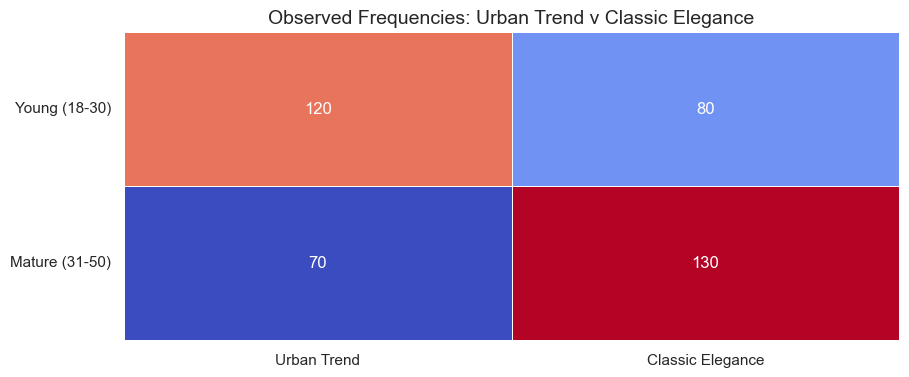

In [18]:
# Styling
sns.set(style='whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.heatmap(df,
                 annot=True,
                 cmap='coolwarm',
                 fmt='d',
                 linewidths=0.5,
                 cbar=False)
plt.title('Observed Frequencies: Urban Trend v Classic Elegance',
          fontsize=14)
plt.yticks(rotation=0)
plt.show();

In [19]:
# Chi square test
statistic, pvalue, _, expected_frequencies = stats.chi2_contingency(df)
interpret_p_value(pvalue, threshold=0.05)

p-value (9.288788860869376e-07) is less than the threshold (0.05).
Evidence suggests rejecting the null hypothesis.


In [20]:
expected_frequencies

array([[ 95., 105.],
       [ 95., 105.]])